In [1]:
!ls

CONTRIBUTING.md
INFO.md
LICENSE.md
Project_work.ipynb
README.md
data
example_dashboard.png
student.ipynb


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('data/Aviation_data.csv', encoding = 'ISO-8859-1', low_memory = False)

In [4]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
df['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

In [7]:
df['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [8]:
df_aircraft = df.loc[df['Aircraft.Category']=='Airplane']

In [9]:
df_aircraft.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [10]:
df_aircraft['Aircraft.Category'].value_counts()

Airplane    27617
Name: Aircraft.Category, dtype: int64

In [11]:
df_aircraft.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      7
Country                       7
Latitude                   5525
Longitude                  5534
Airport.Code               9844
Airport.Name               9361
Injury.Severity             814
Aircraft.damage            1282
Aircraft.Category             0
Registration.Number         226
Make                          9
Model                        31
Amateur.Built                17
Number.of.Engines          2754
Engine.Type                4226
FAR.Description             499
Schedule                  24627
Purpose.of.flight          3739
Air.carrier               16350
Total.Fatal.Injuries       3165
Total.Serious.Injuries     3224
Total.Minor.Injuries       2878
Total.Uninjured             900
Weather.Condition          3053
Broad.phase.of.flight     21209
Report.Status              4971
Publication.Date           2240
dtype: i

In [12]:
df_aircraft_clean = df_aircraft.dropna(subset=['Model', 'Make'])


In [13]:
df_aircraft_clean.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [14]:
df_aircraft_clean.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      7
Country                       7
Latitude                   5498
Longitude                  5507
Airport.Code               9825
Airport.Name               9346
Injury.Severity             812
Aircraft.damage            1279
Aircraft.Category             0
Registration.Number         223
Make                          0
Model                         0
Amateur.Built                17
Number.of.Engines          2749
Engine.Type                4213
FAR.Description             499
Schedule                  24598
Purpose.of.flight          3730
Air.carrier               16323
Total.Fatal.Injuries       3159
Total.Serious.Injuries     3216
Total.Minor.Injuries       2871
Total.Uninjured             894
Weather.Condition          3044
Broad.phase.of.flight     21195
Report.Status              4962
Publication.Date           2237
dtype: i

In [15]:
df_aircraft_clean['Make'].value_counts().head(15)

CESSNA                4864
Cessna                3607
PIPER                 2804
Piper                 1910
BOEING                1034
BEECH                 1018
Beech                  674
Boeing                 287
MOONEY                 238
CIRRUS DESIGN CORP     218
AIR TRACTOR INC        217
AIRBUS                 216
Mooney                 181
Grumman                173
BELLANCA               158
Name: Make, dtype: int64

In [16]:
len(df_aircraft_clean['Make'].unique())

3869

In [17]:
df['Make'].value_counts().head(15)

Cessna       22227
Piper        12029
CESSNA        4922
Beech         4330
PIPER         2841
Bell          2134
Boeing        1594
BOEING        1151
Grumman       1094
Mooney        1092
BEECH         1042
Robinson       946
Bellanca       886
Hughes         795
Schweizer      629
Name: Make, dtype: int64

In [18]:
df['Amateur.Built'].value_counts()

No     80312
Yes     8475
Name: Amateur.Built, dtype: int64

In [19]:
df['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
Hybrid Rocket          1
UNK                    1
Name: Engine.Type, dtype: int64

In [20]:
df['Schedule'].value_counts()

NSCH    4474
UNK     4099
SCHD    4009
Name: Schedule, dtype: int64

In [21]:
df['Purpose.of.flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [22]:
df['Air.carrier'].value_counts()

Pilot                            258
American Airlines                 90
United Airlines                   89
Delta Air Lines                   53
SOUTHWEST AIRLINES CO             42
                                ... 
FORT WAYNE FLIGHT ACADEMY INC      1
WARREN COUNTY AIRPORT LTD          1
DIRKS DARREL                       1
LUIS M. JARA                       1
(dba: Alaska Helicopter Inc.)      1
Name: Air.carrier, Length: 13590, dtype: int64

In [23]:
df['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [24]:
df_clean = df.dropna(subset=['Make'])

In [25]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].str.strip().str.upper()

C:\Users\yasit\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [26]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
    "AMERICAN LEGAND AIRCRAFT": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT CO": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT CO.": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT COMPA": "AMERICAN LEGEND"})

In [27]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
 "CESNA": "CESSNA",
    "CESSNA AIRCRAFT": "CESSNA",
    "CESSNA AIRCRAFT CO": "CESSNA",
    "CESSNA AIRCRAFT CO.": "CESSNA",
    "CESSNA AIRCRAFT COMPANY": "CESSNA",
    "CESSNA ECTOR":"CESSNA",
    "CESSNA REEMS":"CESSNA",
    "CESSNA REIMS":"CESSNA",
    "CESSNA ROBERTSON":"CESSNA",
    "CESSNA SKYHAWK II":"CESSNA",
    "CESSNA SOLOY":"CESSNA",
    "CESSNA WREN":"CESSNA",
    "CESSNA/AIR REPAIR INC":"CESSNA",
    "CESSNA/WEAVER":"CESSNA"})

In [28]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"PIPER / LAUDEMAN":"PIPER",
"PIPER AEROSTAR":"PIPER",
"PIPER AIRCRAFT":"PIPER",
"PIPER AIRCRAFT CORPORATION":"PIPER",
"PIPER AIRCRAFT INC":"PIPER",
"PIPER AIRCRAFT, INC.":"PIPER",
"PIPER CUB CRAFTERS":"PIPER",
"PIPER PAWNEE":"PIPER",
"PIPER-AEROSTAR":"PIPER",
"PIPER-HARRIS":"PIPER",
"PIPER/CUB CRAFTERS":"PIPER",
"PIPER/STEVENS":"PIPER",
"PIPER/WALLY'S FLYERS INC":"PIPER"})

In [29]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"BOEING (STEARMAN)":"BOEING",
"BOEING - CANADA (DE HAVILLAND)":"BOEING",
"BOEING 777-306ER":"BOEING",
"BOEING COMMERCIAL AIRPLANE GRO":"BOEING",
"BOEING COMPANY":"BOEING",
"BOEING COMPANY, LONG BEACH DIV":"BOEING",
"BOEING HELICOPTERS DIV.":"BOEING",
"BOEING OF CANADA/DEHAV DIV":"BOEING",
"BOEING STEARMAN":"BOEING",
"BOEING VERTOL":"BOEING",
"BOEING-BROWN":"BOEING",
"BOEING-STEARMAN":"BOEING",
"BOEING-VERTOL":"BOEING"})

In [30]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"ROBINSON HELICOPTER":"ROBINSON",
"ROBINSON HELICOPTER CO":"ROBINSON",
"ROBINSON HELICOPTER CO INC":"ROBINSON",
"ROBINSON HELICOPTER CO.":"ROBINSON",
"ROBINSON HELICOPTER COMPANY":"ROBINSON",
"ROBINSON HELICOPTERS":"ROBINSON",
"ROBINSON MICHAEL E":"ROBINSON",
"ROBINSON STEWART J":"ROBINSON"})

In [31]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"BEECH AIRCRAFT":"BEECH",
"BEECH AIRCRAFT CO.":"BEECH",
"BEECH AIRCRAFT CORP":"BEECH",
"BEECH AIRCRAFT CORPORATION":"BEECH",
"BEECHCRAFT":"BEECH",
"BEECHCRAFT CORPORATION":"BEECH",
"BEECHER":"BEECH"})


In [ ]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"AIRBUS INDUSTRIE":"AIRBUS",
})

In [ ]:
df_clean.loc[:,"Make"] = df_clean.loc[:,"Make"].replace({
"MCDONNELL DOUGLAS CORPORATION":"MCDONALD DOUGLAS",
    "MCDONNELL-DOUGLAS":"MCDONALD DOUGLAS",
    "MCDONNELL DOUGLAS":"MCDONALD DOUGLAS",
    "MCDONNELL DOUGLAS AIRCRAFT CO":"MCDONALD DOUGLAS"
})

In [32]:
pd.set_option('display.max_rows', None)

In [33]:
df_clean['Make_Model'] = df_clean['Make']+ " "+ df_clean['Model']

<ipython-input-33-5af32d7e7560>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Make_Model'] = df_clean['Make']+ " "+ df_clean['Model']


In [34]:
List_Make = df_clean.loc[df_clean['Aircraft.Category'] =='Airplane']
List_Make = List_Make['Make_Model'].unique()

In [35]:
mask = (df_clean['Aircraft.Category'].isnull()) & (df_clean['Make_Model'].isin(List_Make))
df_clean.loc[mask, 'Aircraft.Category'] = 'Airplane'

C:\Users\yasit\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [36]:
df_clean['Aircraft.Category'].value_counts()

Airplane             68063
Helicopter            3437
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [37]:
df_clean.shape

(88826, 32)

In [ ]:
df_clean[df_clean["Report.Status"].str.contains("pilot")==False]

In [ ]:
df_clean['Make'].value_counts().head()

In [ ]:
df_clean['Investigation.Type'].value_counts()

In [ ]:
df_clean['Aircraft.damage'].value_counts()

In [ ]:
df_clean.isna().sum()

In [ ]:
df_clean['Make_Model'] = df_clean['Make']+ " "+ df_clean['Model']

In [ ]:
df_clean.head()

In [ ]:
df_clean['Purpose.of.flight'].value_counts()

In [ ]:
Make_list = df_clean['Make'].unique()
len(Make_list)

In [ ]:
df_clean_Airplane = df_clean.loc[df_clean['Aircraft.Category'] == 'Airplane']

In [ ]:
df_clean_Airplane.head()

In [ ]:
df_clean['Aircraft.Category'].value_counts()

In [ ]:
df_clean['Aircraft.damage'].value_counts()

In [ ]:
df_clean['Amateur.Built'].value_counts()

In [ ]:
df_clean['Number.of.Engines'].value_counts()

In [ ]:
df_clean['Engine.Type'].value_counts()

In [ ]:
df_clean['FAR.Description'].value_counts()

In [ ]:
df_clean['Purpose.of.flight'].value_counts()

In [226]:
df_clean['Air.carrier'].isna().sum()

72202

In [227]:
len(df_clean['Event.Id'])

88826

In [228]:
df_clean['Broad.phase.of.flight'].value_counts()

Landing        15427
Takeoff        12490
Cruise         10267
Maneuvering     8143
Approach        6543
Climb           2034
Taxi            1958
Descent         1886
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [229]:
df_clean['Investigation.Type'].value_counts()

Accident    84979
Incident     3847
Name: Investigation.Type, dtype: int64

In [230]:
df_clean.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Make_Model
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,STINSON 108-3
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,PIPER PA24-180
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,CESSNA 172M
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,ROCKWELL 112
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,CESSNA 501


In [231]:
df_clean['Aircraft.Category'].value_counts()

Airplane             27608
Helicopter            3437
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [232]:
df_clean['Aircraft.Category'].isna().sum()

56551

In [233]:
df_clean_aircraft = df_clean.dropna(subset=['Aircraft.Category'])

In [234]:
df_clean_aircraft.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Make_Model
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,MCDONNELL DOUGLAS DC9
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,CESSNA 140
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,CESSNA 401B
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,BELLANCA 17-30A
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,CESSNA R172K


In [235]:
df_clean_aircraft['Aircraft.Category'].value_counts()

Airplane             27608
Helicopter            3437
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [236]:
df_clean_aircraft = df_clean_aircraft.loc[df_clean_aircraft['Aircraft.Category']=='Airplane',:]

In [237]:
df_clean_aircraft['Aircraft.Category'].value_counts()

Airplane    27608
Name: Aircraft.Category, dtype: int64

Analyse the No of Engines affect the Safety

In [243]:
df_clean_aircraft.loc[df_clean_aircraft['Number.of.Engines']==8]['Make_Model']

85052    KITTY HAWK Heaviside2
Name: Make_Model, dtype: object

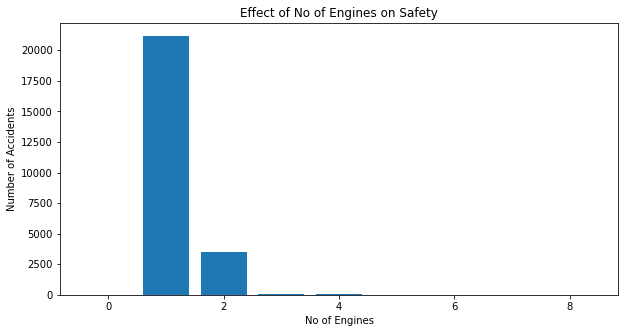

In [244]:
x = df_clean_aircraft['Number.of.Engines'].value_counts().sort_index().index
y = df_clean_aircraft['Number.of.Engines'].value_counts().sort_index().values

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title('Effect of No of Engines on Safety')
ax.set_xlabel('No of Engines')
ax.set_ylabel('Number of Accidents');

What are the Airplanes containing Higher No of Engines

In [245]:
flight_eng = df_clean_aircraft.loc[df_clean_aircraft['Number.of.Engines']>2][['Make_Model','Number.of.Engines']]

In [246]:
flight_eng['Make_Model'].value_counts().head(10)

BOEING 747                  31
MCDONNELL DOUGLAS MD11       6
MCDONNELL DOUGLAS MD-11F     4
BOEING 727-200               3
BOEING 747-422               3
LOCKHEED L-1011              3
LOCKHEED P2V-7               3
BOEING 727                   2
BOEING 727-223               2
BOEING 747-436               2
Name: Make_Model, dtype: int64

Analyse the Engine Type affect the Safety

In [259]:
df_clean_aircraft['Engine.Type'].replace(to_replace='UNK', value='Unknown', regex=True, inplace = True)

In [260]:
df_clean_aircraft['Engine.Type'].value_counts()

Reciprocating      20709
Turbo Prop          1366
Turbo Fan            970
Turbo Jet            158
Unknown              153
Geared Turbofan       12
Turbo Shaft           11
Electric               5
Name: Engine.Type, dtype: int64

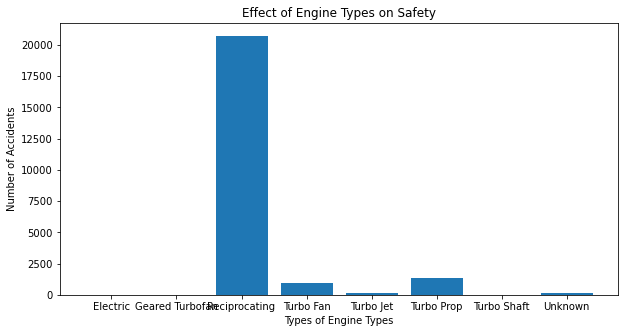

In [261]:
x = df_clean_aircraft['Engine.Type'].value_counts().sort_index().index
y = df_clean_aircraft['Engine.Type'].value_counts().sort_index().values

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title('Effect of Engine Types on Safety')
ax.set_xlabel('Types of Engine Types')
ax.set_ylabel('Number of Accidents');

In [ ]:
Analyse the Weather Condition Equipment affect the Safety

In [277]:
df_clean_aircraft['Weather.Condition'].replace(to_replace='Unk', value='UNK', regex=True, inplace = True)

In [278]:
df_clean_aircraft['Weather.Condition'].value_counts()

VMC    22762
IMC     1409
UNK      385
Name: Weather.Condition, dtype: int64

In [291]:
Broad = df_clean_aircraft.loc[df_clean_aircraft['Make']=='BOEING'][['Broad.phase.of.flight']]


In [292]:
Broad['Broad.phase.of.flight'].value_counts()

Landing        29
Taxi           18
Takeoff        14
Cruise         10
Approach        9
Climb           8
Standing        6
Maneuvering     5
Descent         2
Go-around       2
Name: Broad.phase.of.flight, dtype: int64

In [293]:
Broad = df_clean_aircraft.loc[df_clean_aircraft['Make']=='AIRBUS'][['Broad.phase.of.flight']]

In [294]:
Broad['Broad.phase.of.flight'].value_counts()

Taxi    2
Name: Broad.phase.of.flight, dtype: int64

In [ ]:
Make_Model = df_clean_aircraft.loc[df_clean_aircraft['Number.of.Engines']>=2][['Make','Number.of.Engines',]]

In [134]:
df_clean_aircraft['Total.Injuries'] = df_clean_aircraft['Total.Fatal.Injuries'] + df_clean_aircraft['Total.Serious.Injuries']+df_clean_aircraft['Total.Minor.Injuries']

In [135]:
df_clean_aircraft.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Make_Model,Total.Injuries
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,MCDONNELL DOUGLAS DC9,NaN
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,CESSNA 140,0.0
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,CESSNA 401B,0.0
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,BELLANCA 17-30A,1.0
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,CESSNA R172K,1.0


In [82]:
df_clean_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27608 entries, 5 to 90345
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                27608 non-null  object 
 1   Investigation.Type      27608 non-null  object 
 2   Accident.Number         27608 non-null  object 
 3   Event.Date              27608 non-null  object 
 4   Location                27601 non-null  object 
 5   Country                 27601 non-null  object 
 6   Latitude                22091 non-null  object 
 7   Longitude               22082 non-null  object 
 8   Airport.Code            17771 non-null  object 
 9   Airport.Name            18253 non-null  object 
 10  Injury.Severity         26794 non-null  object 
 11  Aircraft.damage         26328 non-null  object 
 12  Aircraft.Category       27608 non-null  object 
 13  Registration.Number     27384 non-null  object 
 14  Make                    27608 non-null

In [302]:
List_Make = df_clean.loc[df_clean['Aircraft.Category'] =='Airplane']
List_Make = List_Make['Make_Model'].unique()
len(List_Make)

7449

In [303]:
row_index = len(df_clean)
for item in List_Make:
    for row in range(row_index):
        if (df_clean['Aircraft.Category'].isnull().loc[row]) & (df_clean['Make_Model'].loc[row] == item):
            df_clean.loc[row,'Aircraft.Category']='Airplane'  


KeyError: 1767

In [304]:
mask = (df_clean['Aircraft.Category'].isnull()) & (df_clean['Make_Model'].isin(List_Make))
df_clean.loc[mask, 'Aircraft.Category'] = 'Airplane'

C:\Users\yasit\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [306]:
df_clean['Aircraft.Category'].value_counts()

Airplane             68063
Helicopter            3437
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [307]:
import pandas as pd
from fuzzywuzzy import fuzz

df1 = pd.DataFrame({'name': ['John Doe', 'Jane Doe', 'John Smith']})

# Find the closest match for each name in the dataframe
for name in df['name']:
   closest_match = fuzz.partial_ratio(name, df1['name'].values)
   print(name, closest_match)

ModuleNotFoundError: No module named 'fuzzywuzzy'

In [311]:
import pandas as pd
from fuzzywuzzy import fuzz

# Sample data
data = {
'column_name': ['apple', 'appel', 'banana', 'aple', 'banan', 'oranje', 'orange'],
'another_column': [1, 2, 3, 4, 5, 6, 7]
}
df1 = pd.DataFrame(data)

def fuzzy_filter(df1, column_name, target_string, threshold=85):
    """Filter rows in a dataframe based on a fuzzy match to a target string in a specific column."""
    return df1[df1[column_name].apply(lambda x: fuzz.ratio(x, target_string) >= threshold)]

target = 'apple'
filtered_df = fuzzy_filter(df1, 'column_name', target)

print(filtered_df)

ModuleNotFoundError: No module named 'fuzzywuzzy'

In [323]:
import pandas as pd
import difflib


def fuzzy_filter_difflib(df, column_name, target_string, threshold=0.4):
   """Filter rows in a dataframe based on a fuzzy match to a target string in a specific column using difflib."""
   def match_ratio(x):
      return difflib.SequenceMatcher(None, str(x), target_string).ratio()

   return df[~df['Report.Status'].isnull()][df['Report.Status'].apply(match_ratio) >= threshold]

target = 'Pilot'
filtered_df = fuzzy_filter_difflib(df_clean, 'Report.Status', target)

print(filtered_df)

Empty DataFrame
Columns: [Event.Id, Investigation.Type, Accident.Number, Event.Date, Location, Country, Latitude, Longitude, Airport.Code, Airport.Name, Injury.Severity, Aircraft.damage, Aircraft.Category, Registration.Number, Make, Model, Amateur.Built, Number.of.Engines, Engine.Type, FAR.Description, Schedule, Purpose.of.flight, Air.carrier, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured, Weather.Condition, Broad.phase.of.flight, Report.Status, Publication.Date, Make_Model]
Index: []

[0 rows x 32 columns]


<ipython-input-323-31478f50d0c8>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[~df['Report.Status'].isnull()][df['Report.Status'].apply(match_ratio) >= threshold]
